In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('../machine-scientist/')
sys.path.append('../machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [2]:
TRUE_NGUYEN = {
    1 : lambda x: 3.39 * x**3 + 2.12 * x**2 + 1.78 * x,
    5 : lambda x: np.sin(x**2) * np.cos(x) - .75,
    7 : lambda x: np.log(x + 1.4) + np.log(x**2 + 1.3),
    8 : lambda x: np.sqrt(1.23 * x),
}

In [3]:
#Read NN and BMS data
n=5;
sigma=0.14
realization=1
#runid=2;

NPAR=10 #10, 20
steps=50000

resolution='1x' #'0.5x', '1x', '2x', 'test'
test=False

file_model='NN_no_overfit_sigma_' + str(sigma) + '_r_' + str(realization) + '.csv'
model_d='../../data/nguyen/' + resolution + '_resolution/trained_nns/' + file_model

d=pd.read_csv(model_d)
dn=d[d['rep']==n]
dn.set_index('Unnamed: 0', inplace=True)
dn.index.name = None
dn=dn.reset_index(drop=True)
display(dn)

#Read BMS trace
if resolution=='1x':

    filename='BMS_nguyen_n_' + str(n)+'_sigma_'+str(sigma)+ '_r_' + str(realization) + '_id_0_trace_'+str(steps)+'_prior_'+str(NPAR)+ '.csv'

elif resolution=='0.5x':
   
    filename='BMS_nguyen_n' + str(n)+'_sigma_'+str(sigma)+ '_r_' + str(realization) + '_res_0.1_trace_'+str(steps)+'_prior_'+str(NPAR) + '.csv'

elif resolution=='2x':
  
    filename='BMS_nguyen_n' + str(n)+'_sigma_'+str(sigma)+ '_r_' + str(realization) + '_res_0.025_trace_'+str(steps)+'_prior_'+str(NPAR) + '.csv'
    
trace=pd.read_csv('../../data/MSTraces/nguyen/' + resolution + '_resolution/' + filename, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2','kk3'])

,x,y,z,rep,noise,z_noise,zmodel
0,-1.000,0.0,-0.295351,5,-0.126249,-0.421600,-0.293415
1,-0.975,0.0,-0.293333,5,0.173575,-0.119759,-0.287083
2,-0.950,0.0,-0.293449,5,0.026846,-0.266603,-0.283029
3,-0.925,0.0,-0.295626,5,-0.244220,-0.539846,-0.281435
4,-0.900,0.0,-0.299776,5,0.113790,-0.185986,-0.282433
...,...,...,...,...,...,...,...
75,0.875,0.0,-0.305797,5,0.114109,-0.191688,-0.405598
76,0.900,0.0,-0.299776,5,0.064769,-0.235007,-0.389633
77,0.925,0.0,-0.295626,5,0.204639,-0.090988,-0.373456
78,0.950,0.0,-0.293449,5,-0.365138,-0.658588,-0.357088


In [4]:
#Parameters to read models
VARS = ['x',]
x = dn[[c for c in VARS]].copy()

if NPAR==10:
    prior_par = read_prior_par('../machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np10.2017-10-18 18:07:35.089658.dat')
elif NPAR==20:
    prior_par = read_prior_par('../machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np20.maxs200.2024-05-10 162907.551306.dat')

In [5]:
#Minimum description length model
y=dn.z_noise

minrow = trace[trace.H == min(trace.H)].iloc[0]
minH, minexpr, minparvals = minrow.H, minrow.expr, ast.literal_eval(minrow.parvals)

t = Tree(
    variables=list(x.columns),
    parameters=['a%d' % i for i in range(NPAR)],
    x=x, y=y,
    prior_par=prior_par,
    max_size=200,
    from_string=minexpr,
)

t.set_par_values(deepcopy(minparvals))



In [6]:
display(t)
display(t.par_values)

(((x * _a5_) ** 2) + _a5_)

{'d0': {'_a5_': -0.7028579619113167,
  '_a0_': 1.0,
  '_a1_': 1.0,
  '_a2_': 1.0,
  '_a3_': 1.0,
  '_a4_': 1.0,
  '_a6_': 1.0,
  '_a7_': 1.0}}

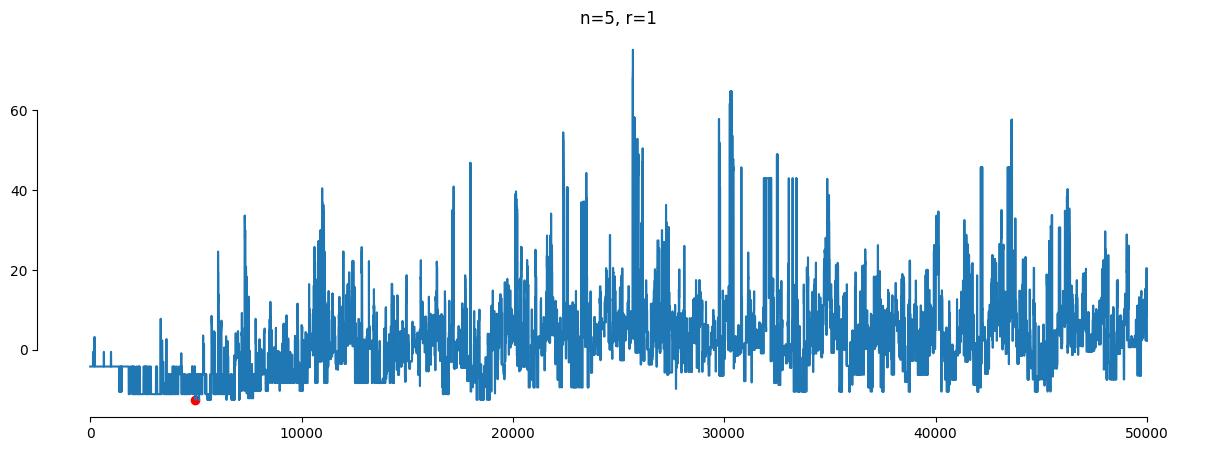

In [7]:
Nini = 00
plt.figure(figsize=(15, 5))

#Define figure size in cm                                                                           
Extensions=['.png']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                           
plt.title( 'n=' + str(n) +', r=' + str(realization))
plt.plot(trace.t[trace.t > Nini], trace.H[trace.t > Nini])
plt.scatter(minrow['t'], minH,color='r')
sns.despine(trim=True)

#Name_figure='Energy_' + function + '_n_' + str(n) + '_sigma_' + str(sigma) + '_r_'  + str(realization) + '_par_' + str(NPAR)

#for ext in Extensions:
#        plt.savefig('../results/' + Name_figure + ext,dpi=300)

 
plt.show()

0.2250000000000009
60
0.4750000000000014


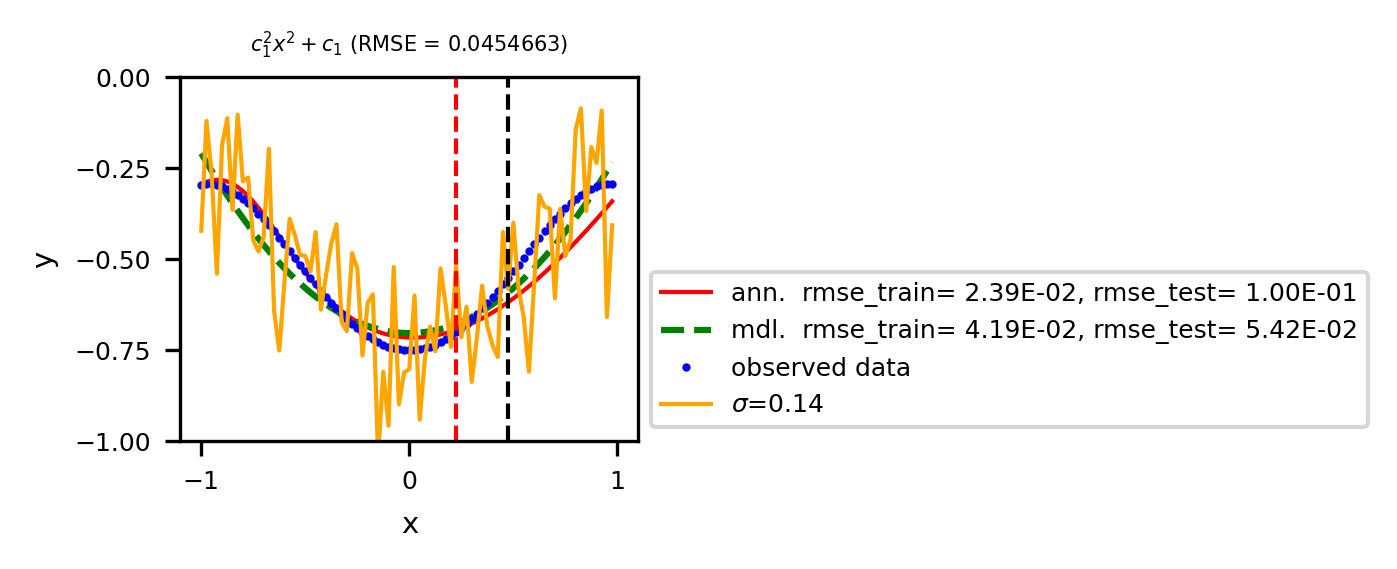

(((x * _a5_) ** 2) + _a5_) {'d0': {'_a5_': -0.7028579619113167, '_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}


<Figure size 640x480 with 0 Axes>

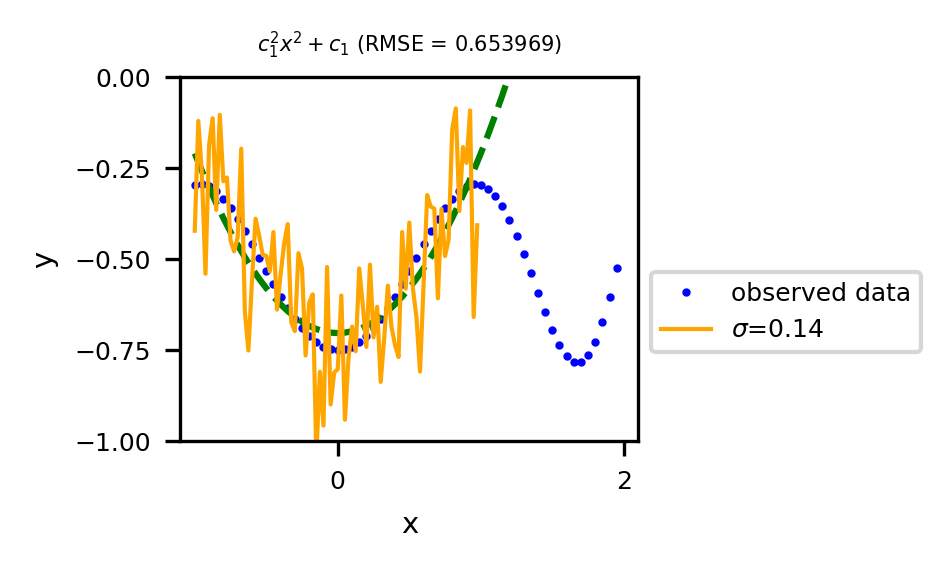

In [8]:
#Plot
if resolution=='0.5x':
    train_size_ann=25
    train_size=30
elif resolution=='1x':
    train_size_ann=50
    train_size=60
elif resolution=='2x':
    train_size_ann=100
    train_size=120


validation_border=dn.loc[train_size_ann-1]['x']
print(validation_border)

train_border=dn.loc[train_size-1]['x']
print(train_size)
print(train_border)

dplot = deepcopy(dn)
dplot['ybms'] = t.predict(x)




rmse_nn_train=root_mean_squared_error(dplot.loc[:train_size-1]['zmodel'],dplot.loc[:train_size -1]['z'])
rmse_nn_test=root_mean_squared_error(dplot.loc[train_size-1:]['zmodel'],dplot.loc[train_size -1:]['z'])

rmse_mdl_train=root_mean_squared_error(dplot.loc[:train_size-1]['ybms'],dn.loc[:train_size-1]['z'])
rmse_mdl_test =root_mean_squared_error(dplot.loc[train_size-1:]['ybms'],dn.loc[train_size-1:]['z'])

rmse_mdl_total=root_mean_squared_error(dplot['ybms'],dn['z'])

 
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 5*cm; height=4*cm

Extensions=['.png']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          


#Plot original figure
#----------------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)                                                        


plt.plot(dn['x'], dn['zmodel'],linewidth=line_w, color='red', label='ann.  rmse_train= %.2E, rmse_test= %.2E' % ( rmse_nn_train, rmse_nn_test)) 
plt.plot(dplot.x, dplot.ybms, color='green', linestyle='--',label='mdl.  rmse_train= %.2E, rmse_test= %.2E' % ( rmse_mdl_train, rmse_mdl_test)) 
plt.plot(dn['x'], dn['z'],'.', markersize=2, color='blue',label='observed data') 
plt.plot(dn['x'], dn['z_noise'],linewidth=line_w, markersize=2, color='orange',label=r'$\sigma$=' + str(sigma) ) 

plt.axvline(x=validation_border,linestyle='--',linewidth=line_w, color='r')
plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')


plt.title('$%s$ (RMSE = %g)' % (t.latex(), rmse_mdl_total),fontsize=size_title)
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), fontsize=size_ticks)

if n==1:
    plt.xlim(-1.1, 1.1);plt.ylim(-2.6,5.1)
elif n==5:
    plt.xlim(-1.1, 1.1);plt.ylim(-1,0)
elif n==7:
    plt.xlim(-0.1, 2.1);plt.ylim(0.5,2.5)

plt.show()

if test==False:
    Name_figure='Prediction_' + resolution + '_' + 'nguyen_n_' + str(n) + '_sigma_' + str(sigma) + '_r_'  + str(realization) + '_par_' + str(NPAR)
elif test==True:
     Name_figure='Prediction_test' + resolution + '_' + function + '_n_' + str(n) + '_sigma_' + str(sigma) + '_r_'  + str(realization) + '_par_' + str(NPAR)

print(t,t.par_values)
    
for ext in Extensions:
        plt.savefig('../../results/nguyen/' + Name_figure +ext,dpi=300)
#----------------------------------------------------------------------------------------


#Plot Roger's test
#----------------------------------------------------------------------------------------
x_test_show= np.arange(-1, 2, 0.05)
dplot_test = pd.DataFrame({'x' : x_test_show})
model_test = t.predict(dplot_test)
z_test=TRUE_NGUYEN[n](x_test_show)

dplot_test['ybms_test']=model_test
dplot_test['z_test']=z_test

rmse_mdl_total_test=root_mean_squared_error(model_test,z_test)

fig=figure(figsize=(width,height), dpi=300) 

plt.plot(dplot_test.x, dplot_test.z_test, '.', markersize=2, color='blue',label='observed data') 
plt.plot(dplot_test.x, dplot_test.ybms_test, color='green', linestyle='--')
plt.plot(dn['x'], dn['z_noise'],linewidth=line_w, color='orange',label=r'$\sigma$=' + str(sigma) )

plt.title('$%s$ (RMSE = %g)' % (t.latex(), rmse_mdl_total_test),fontsize=size_title) 
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), fontsize=size_ticks)

if n==1:
    plt.xlim(-1.1, 2.1);plt.ylim(-2.6,50)
elif n==5:
    plt.xlim(-1.1, 2.1);plt.ylim(-1,0)
elif n==7:
    plt.xlim(-0.1, 2.1);plt.ylim(0.5,2.5)


#if test==False:
#    Name_figure='Prediction_' + resolution + '_' + 'nguyen_n_' + str(n) + '_sigma_' + str(sigma) + '_r_'  + str(realization) + '_par_' + str(NPAR)
#elif test==True:
#     Name_figure='Prediction_test' + resolution + '_' + function + '_n_' + str(n) + '_sigma_' + str(sigma) + '_r_'  + str(realization) + '_par_' + str(NPAR)

    
#for ext in Extensions:
#        plt.savefig('../../results/nguyen/' + Name_figure +ext,dpi=300)

plt.show()
#----------------------------------------------------------------------------------------

#print(t.__dict__)
#print(t.par_values)


In [ ]:
t.par_values


In [ ]:
print(len(t.par_values['d0']))

a0=t.par_values['d0']['_a0_']
a1=t.par_values['d0']['_a1_']
a2=t.par_values['d0']['_a2_']
a3=t.par_values['d0']['_a3_']
a4=t.par_values['d0']['_a4_']
a5=t.par_values['d0']['_a5_']
a6=t.par_values['d0']['_a6_']
a7=t.par_values['d0']['_a7_']
print(a1, a2, a3)
    

In [ ]:
a5**2